# Analisis

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Para obtener todo:
Primero correr la notebook de generar instancias, hay que crear la capreta "instancias" y dentro de ella las correspondientes para cada dataset, luego correr.
Proximo es correr toda la notebook de experimentos para guardar los resultados temporales.
## Los casos
Estos son:
- FB
    - Corrimos casos donde todo entra, nada entra, y random. Para mostrar que sin importar la instancia sigue recorriendo todo.
- BT
    - La complejidad con ambas podas, con poda por factibilidad y con poda por optimalidad
    - Luego analizamos las podas para las distintas instancias, de objetos debiles y luego fuertes
- PD
    - Aqui corremos para objetos debiles, fuertes y para instancias aleatorias con n y R grandes con poca granularidad, es decir variando ambas variables de a grandes saltos.


**Leemos las instancias**

In [48]:
df_resultados = pd.read_csv("resultados/resultado.csv");


df_resultados2 = pd.read_csv("resultados/resultado2.csv");

# Experimento 1, Complejidad FB

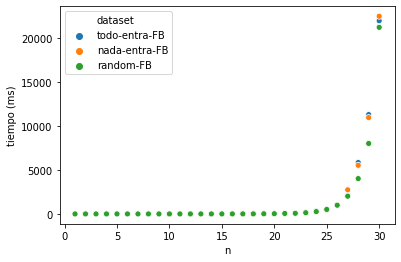

In [49]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
# hue: agrupa los puntos segun esta lista, puede ser por string o numeros
# en nuestro caso tenemos los puntos de distintos datasets
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-casos.svg");

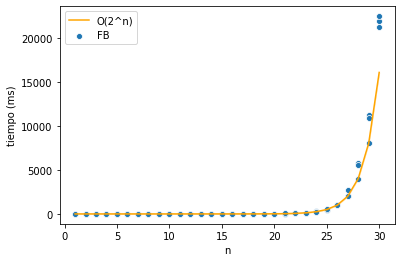

In [50]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["n"] * 0.000015; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: 0.9963453573489787


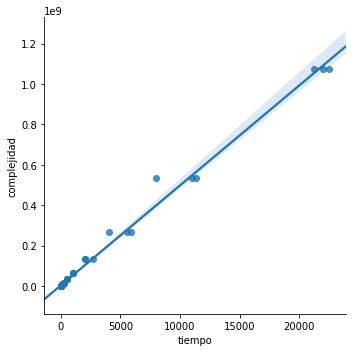

In [51]:
# Graficamos los tiempos de ejecución de las instancias contra complejidad esperada.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

# Experimento 2, Complejidad BT

## Mejor caso BT, ambas podas

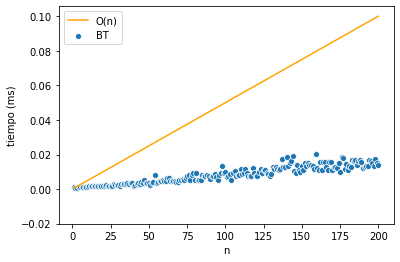

In [52]:

df_BT_mejor_caso = df_resultados2[(df_resultados2["metodo"]=="BT") & (df_resultados2["dataset"] == "mejor-caso-BT-F")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.0005; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9270558742739956


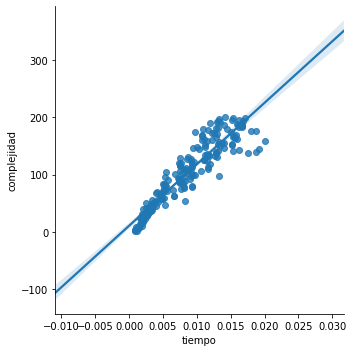

In [53]:
# Graficamos la correlacion entre los tiempos reales y la complejidad esperada
df_BT_mejor_caso = df_resultados2[(df_resultados2["metodo"]=="BT") & (df_resultados2["dataset"] == "mejor-caso-BT-F")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

## Analisis de las podas

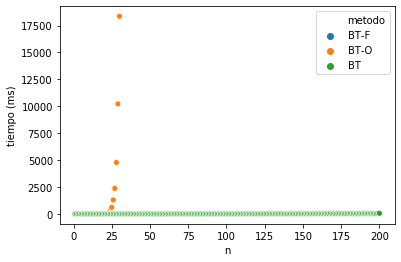

In [76]:
# Para objetos debiles
df_BT_fuertes = df_resultados[((df_resultados["metodo"] == "BT-F") | (df_resultados["metodo"] == "BT-O")) & (df_resultados["dataset"] == "ratio-resistenciam1")].copy();
df_BT_fuertes2 = df_resultados2[(df_resultados2["metodo"]=="BT") & (df_resultados2["dataset"] == "ratio-resistenciam1")].copy();
df_BT_fuertes = pd.concat([df_BT_fuertes, df_BT_fuertes2])
#df_BT_fuertes = df_BT_fuertes[df_BT_fuertes["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_fuertes, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-fuertes.svg");

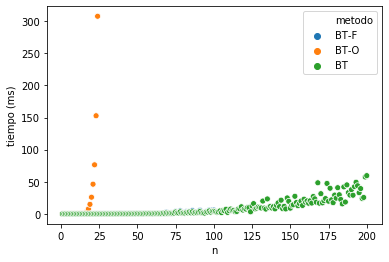

In [77]:
#Veamos un poquito mas de cerca
# Para objetos debiles
df_BT_fuertes = df_resultados[((df_resultados["metodo"] == "BT-F") | (df_resultados["metodo"] == "BT-O")) & (df_resultados["dataset"] == "ratio-resistenciam1")].copy();
df_BT_fuertes2 = df_resultados2[(df_resultados2["metodo"]=="BT") & (df_resultados2["dataset"] == "ratio-resistenciam1")].copy();
df_BT_fuertes = pd.concat([df_BT_fuertes, df_BT_fuertes2])
df_BT_fuertes = df_BT_fuertes[df_BT_fuertes["tiempo"] < 400]
fig = sns.scatterplot(data=df_BT_fuertes, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-fuertes.svg");
plt.savefig("graficos/bt-podas-debiles-cerca.svg");

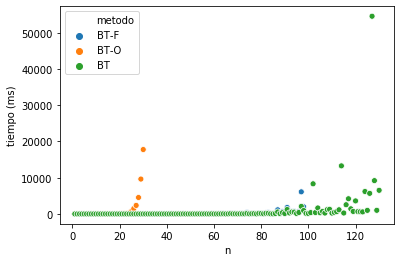

In [74]:
# Para objetos debiles

df_BT_fuertes = df_resultados[((df_resultados["metodo"] == "BT-F") | (df_resultados["metodo"] == "BT-O")) & (df_resultados["dataset"] == "ratio-resistenciaM1")].copy();
df_BT_fuertes2 = df_resultados2[(df_resultados2["metodo"]=="BT") & (df_resultados2["dataset"] == "ratio-resistenciaM1")].copy();
df_BT_fuertes = pd.concat([df_BT_fuertes, df_BT_fuertes2])
#df_BT_fuertes = df_BT_fuertes[df_BT_fuertes["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_fuertes, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-debiles.svg");

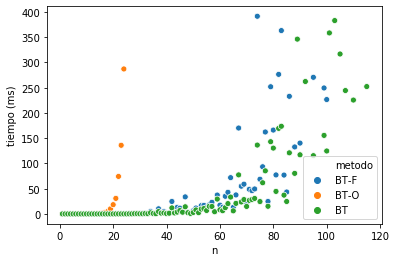

In [73]:
#Veamos un poquito mas de cerca
# Para objetos fuertes
df_BT_fuertes = df_resultados[((df_resultados["metodo"] == "BT-F") | (df_resultados["metodo"] == "BT-O")) & (df_resultados["dataset"] == "ratio-resistenciaM1")].copy();
df_BT_fuertes2 = df_resultados2[(df_resultados2["metodo"]=="BT") & (df_resultados2["dataset"] == "ratio-resistenciaM1")].copy();
df_BT_fuertes = pd.concat([df_BT_fuertes, df_BT_fuertes2])
df_BT_fuertes = df_BT_fuertes[df_BT_fuertes["tiempo"] < 400]
fig = sns.scatterplot(data=df_BT_fuertes, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-fuertes.svg");
plt.savefig("graficos/bt-podas-debiles-cerca.svg");

## Complejidad de Programacion Dinamica

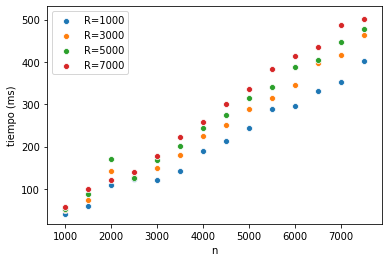

In [57]:
#Variamos el n, y fijamos un R
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

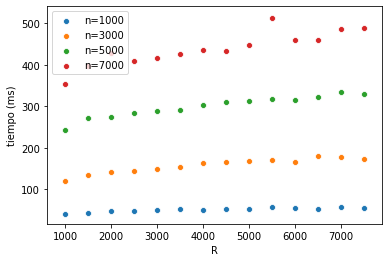

In [58]:
#Variamos el R, y fijamos un n
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='R', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='R', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

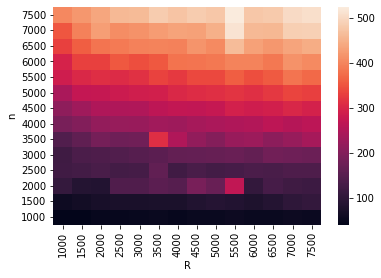

In [59]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='R', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.775816660743017


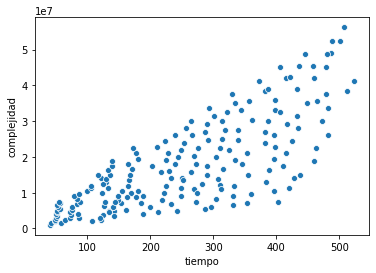

In [60]:

df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["R"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

# Back Tracking vs Programacion Dinamica